In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from warnings import filterwarnings
filterwarnings('ignore')

In [30]:
df = pd.read_csv("datasets\diabetic_data.csv")

In [31]:

style = """
<style>
.pretty-table {
  border-collapse: collapse;
  width: 430px;
  font-size: 15px;
  margin-bottom: 32px;
}
.pretty-table th, .pretty-table td {
  border: 1px solid #bbb;
  padding: 7px 12px;
  text-align: left;
}
.pretty-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: bold;
  letter-spacing: 0.5px;
}
.pretty-table tr:nth-child(even) {
  background: #f4f8fb;
}
.pretty-table tr:nth-child(odd) {
  background: #e9f2fa;
}
.section-title {
  color: #21618c;
  font-size: 20px;
  font-weight: bold;
  margin: 22px 0 8px 0;
  letter-spacing: 0.5px;
  font-family: sans-serif;
}
</style>
"""

# Create the column+datatype table in HTML
dtype_df = pd.DataFrame({
    "Column": df.columns,
    "Data Type": [df[col].dtype for col in df.columns]
})
dtype_html = dtype_df.to_html(index=False, classes="pretty-table")

# Optional: show shape above
num_rows, num_cols = df.shape
shape_html = f"""
<div style="font-size:16px; margin-bottom:12px;">
    <b>Dataset Shape:</b> {num_rows:,} rows × {num_cols:,} columns
</div>
"""

# Put a section title above table (using your class)
dtype_section = "<div class='section-title' style='margin-top:0;'>Column Names & Data Types</div>"

# Display everything in sequence
display(HTML(
    style + shape_html + dtype_section + dtype_html
))


Column,Data Type
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [32]:
# Get the first 5 and last 5 rows
sample_head = df.head(5).copy()
sample_tail = df.tail(5).copy()

# Stylish, with scrollable container for wide tables
style = """
<style>
.sample-scroll-box {
  width: 100%;
  overflow-x: auto;
  border-radius: 8px;
  border: 1px solid #eee;
  margin-bottom: 32px;
}
.sample-table {
  border-collapse: collapse;
  font-size: 14px;
  min-width: 1200px;
  table-layout: auto;
}
.sample-table th, .sample-table td {
  border: 1px solid #bbb;
  padding: 12px 20px;
  text-align: left;
  font-family: "Segoe UI", Arial, sans-serif;
  vertical-align: middle;
  white-space: pre-line;
}
.sample-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: 600;
  font-size: 15px;
  letter-spacing: 0.5px;
}
.sample-table tr:nth-child(even) { background: #f8fafb; }
.sample-table tr:nth-child(odd)  { background: #e9f2fa; }
.sample-table tr:hover {
  background-color: #d6eaf8 !important;
}
</style>
"""

# Convert DataFrames to HTML tables
sample_head_html = sample_head.to_html(index=False, classes="sample-table")
sample_tail_html = sample_tail.to_html(index=False, classes="sample-table")

summary_html = f"""
<h3>Sample Values for Each Column (first 5 rows)</h3>
<div class="sample-scroll-box">
  {sample_head_html}
</div>
<h3>Sample Values for Each Column (last 5 rows)</h3>
<div class="sample-scroll-box">
  {sample_tail_html}
</div>
"""

display(HTML(style + summary_html))


encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,NaN,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [33]:
# Missing Values
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False))




Missing values per column:
 max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride        

In [34]:
# Numerical descriptive statistics (transposed for readability)
desc_num = df.describe().T

# Categorical/object descriptive statistics
desc_cat = df.describe(include='object').T

# Format function for numbers
def format_val(val):
    if pd.isna(val):
        return ""
    try:
        val = float(val)
    except:
        return str(val)
    if abs(val) >= 100000:
        return f"{val:,.0f}"
    elif val % 1 == 0:
        return f"{int(val)}"
    else:
        return f"{val:.2f}"

# Apply formatter to numerical table
desc_num_fmt = desc_num.applymap(format_val)

# For object stats, display as-is
desc_cat_fmt = desc_cat.fillna("")

# CSS styling (with right-align for numbers, left-align for first column)
style = """
<style>
.stats-scroll-box {
  width: 100%;
  overflow-x: auto;
  border-radius: 8px;
  border: 1px solid #eee;
  margin-bottom: 32px;
}
.stats-table {
  border-collapse: collapse;
  font-size: 15px;
  min-width: 800px;
  table-layout: auto;
}
.stats-table th, .stats-table td {
  border: 1px solid #bbb;
  padding: 9px 16px;
  text-align: right;
  font-family: "Segoe UI", Arial, sans-serif;
  vertical-align: middle;
  white-space: pre-line;
}
.stats-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: 600;
  font-size: 15px;
  letter-spacing: 0.5px;
  text-align: right;
}
.stats-table tr:nth-child(even) { background: #f8fafb; }
.stats-table tr:nth-child(odd)  { background: #e9f2fa; }
.stats-table tr:hover {
  background-color: #d6eaf8 !important;
}
.stats-table td:first-child, .stats-table th:first-child {
  text-align: left !important;
}
</style>
"""

desc_num_html = desc_num_fmt.to_html(classes="stats-table")
desc_cat_html = desc_cat_fmt.to_html(classes="stats-table")

# Display both, with scroll bars if too wide
full_html = f"""
<h3>Descriptive Statistics (Numerical Features)</h3>
<div class="stats-scroll-box">{desc_num_html}</div>
<h3>Descriptive Statistics (Categorical/Object Features)</h3>
<div class="stats-scroll-box">{desc_cat_html}</div>
"""

display(HTML(style + full_html))


,count,mean,std,min,25%,50%,75%,max
encounter_id,"101,766","165,201,646","102,640,296",12522,"84,961,194","152,388,987","230,270,888","443,867,222"
patient_nbr,"101,766","54,330,401","38,696,359",135,"23,413,221","45,505,143","87,545,950","189,502,619"
admission_type_id,"101,766",2.02,1.45,1,1,1,3,8
discharge_disposition_id,"101,766",3.72,5.28,1,1,1,4,28
admission_source_id,"101,766",5.75,4.06,1,1,7,7,25
time_in_hospital,"101,766",4.40,2.99,1,2,4,6,14
num_lab_procedures,"101,766",43.10,19.67,1,31,44,57,132
num_procedures,"101,766",1.34,1.71,0,0,1,2,6
num_medications,"101,766",16.02,8.13,1,10,15,20,81
number_outpatient,"101,766",0.37,1.27,0,0,0,0,42



Unique values in 'age':
 ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Unique values in 'gender':
 ['Female' 'Male' 'Unknown/Invalid']

Unique values in 'race':
 ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Unique values in 'readmitted':
 ['NO' '>30' '<30']

Unique values in 'discharge_disposition_id':
 [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


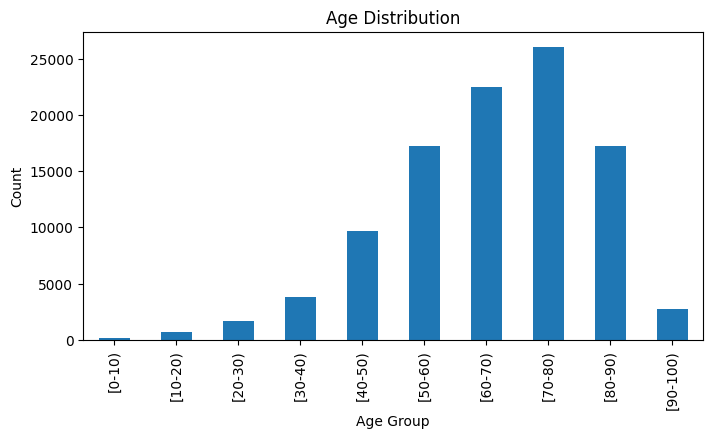

In [35]:
# Unique Values in Important Columns
for col in ['age', 'gender', 'race', 'readmitted', 'discharge_disposition_id']:
    print(f"\nUnique values in '{col}':\n", df[col].unique())

# Visualize Distributions
plt.figure(figsize=(8,4))
df['age'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


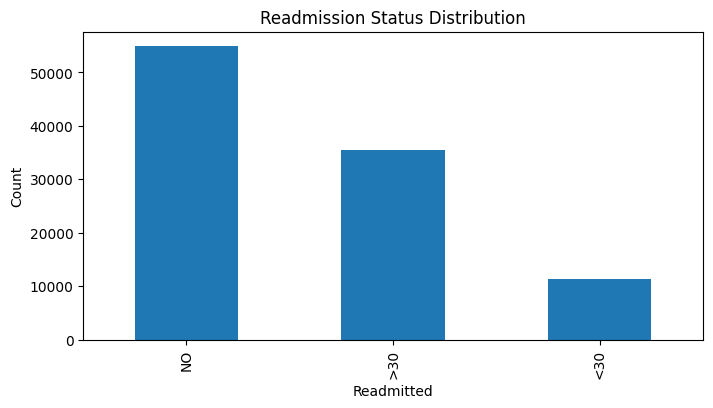

In [36]:

plt.figure(figsize=(8,4))
df['readmitted'].value_counts().plot(kind='bar')
plt.title('Readmission Status Distribution')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()



In [37]:
# Categorical value counts
print("\nReadmission value counts:\n", df['readmitted'].value_counts())
print("\nGender value counts:\n", df['gender'].value_counts())
print("\nRace value counts:\n", df['race'].value_counts())


Readmission value counts:
 readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Gender value counts:
 gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Race value counts:
 race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


##Initial Cleaning done##
1.Remove records for hospice/deceased - Because we want to predict readmissions, patients returning to the hospital, this would also confuse the model

2.Remove patients under 20 or over 80 - Becacuse the age distribution plot shows most patients are between 20 and 80

3.Remove patients with >13 admits in 10 years -most patients have only a few hospital visits, they will be considered extreme outliers, also possibly with chronically ill and also to reduce data errors

4.Basic missing value handling - some data have NA/Unknown, ?







In [38]:

# 1. Remove records for hospice/deceased based on 'discharge_disposition_id'
# Typically, 11 (Expired), 13/14/19/20/21 (Hospice), 18/25/26/28 (NULL, Not Mapped, Unknown/Invalid, Psychiatric transfer, etc.)
hospice_expired_ids = [11, 13, 14, 19, 20, 21]
deceased_null_ids = [18, 25, 26, 28]
remove_ids = hospice_expired_ids + deceased_null_ids
df_clean = df[~df['discharge_disposition_id'].isin(remove_ids)].copy()

# 2. Remove patients under 20 or over 80 (age column is e.g. "[20-30)", "[80-90)" so filter accordingly)
def parse_age(a):
    # Extract first and second number from string like "[40-50)"
    nums = [int(s) for s in a.replace("[","").replace(")","").split('-') if s.isdigit()]
    return nums[0] if nums else None

df_clean['age_num'] = df_clean['age'].apply(parse_age)
df_clean = df_clean[(df_clean['age_num'] >= 20) & (df_clean['age_num'] < 80)]

# 3. Remove patients with >13 admits in 10 years
# 'patient_nbr' is patient identifier; drop those with >13 encounters
admits_per_patient = df_clean.groupby('patient_nbr')['encounter_id'].count()
patients_to_remove = admits_per_patient[admits_per_patient > 13].index
df_clean = df_clean[~df_clean['patient_nbr'].isin(patients_to_remove)]

# 4. Basic missing value handling
# - Drop rows with missing gender, race, or age (if any)
df_clean = df_clean.dropna(subset=['gender', 'race', 'age'])

# - Fill other missing values as appropriate (can customize for your columns)
# For example: Fill '?' with np.nan, then handle
df_clean = df_clean.replace('?', pd.NA)
df_clean = df_clean.fillna('Unknown')  # Or use df_clean = df_clean.dropna() to drop all missing

# 5. Prepare for feature engineering/encoding (leave as-is here, just ready for next step)

# Show cleaning summary
print(f"Final cleaned data shape: {df_clean.shape}")
df_clean.head()


Final cleaned data shape: (74744, 51)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_num
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,20
3,500364,82442376,Caucasian,Male,[30-40),Unknown,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,30
4,16680,42519267,Caucasian,Male,[40-50),Unknown,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,40
5,35754,82637451,Caucasian,Male,[50-60),Unknown,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,50
6,55842,84259809,Caucasian,Male,[60-70),Unknown,3,1,2,4,...,Steady,No,No,No,No,No,Ch,Yes,NO,60


In [39]:
# List of columns to drop
drop_cols = [
    'encounter_id',          # Unique encounter ID
    'patient_nbr',           # Unique patient ID
    'weight',                # >97% missing
    'payer_code',            # Many missing
    'medical_specialty',     # Many missing/high cardinality
    'diag_1', 'diag_2', 'diag_3'  # Raw diagnosis codes - drop if not engineered
]

# Drop these columns
df_model = df_clean.drop(columns=drop_cols, errors='ignore')

# Replace '?' with 'Unknown' in all object/categorical columns
for col in df_model.select_dtypes(include='object'):
    df_model[col] = df_model[col].replace('?', 'Unknown')

print("Remaining columns for one-hot encoding:")
print(list(df_model.columns))

# You can now proceed to one-hot encoding for all categorical features
# For demonstration, let's just show a quick one-hot (do NOT run on the entire dataset for all columns in production)
categorical_cols = df_model.select_dtypes(include='object').columns

# Example: Preview the encoded columns
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=False)
print(f"Shape after one-hot encoding: {df_encoded.shape}")
df_encoded.head()


Remaining columns for one-hot encoding:
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'age_num']
Shape after one-hot encoding: (74744, 110)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
2,1,1,7,2,11,5,13,2,0,1,...,False,True,False,False,True,False,True,False,False,True
3,1,1,7,2,44,1,16,0,0,0,...,False,True,False,True,False,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,False,True,False,True,False,False,True,False,False,True
5,2,1,2,3,31,6,16,0,0,0,...,False,True,False,False,True,False,True,False,True,False
6,3,1,2,4,70,1,21,0,0,0,...,False,True,False,True,False,False,True,False,False,True


In [40]:
drop_table = """
<style>
.summary-table {
  border-collapse: collapse;
  font-size: 15px;
  width: 75%;
  margin-bottom: 24px;
}
.summary-table th, .summary-table td {
  border: 1px solid #bbb;
  padding: 10px 16px;
  text-align: left;
}
.summary-table th {
  background: #2e86c1;
  color: #fff;
  font-weight: bold;
  letter-spacing: 0.5px;
}
.summary-table tr:nth-child(even) { background: #f8fafb; }
.summary-table tr:nth-child(odd)  { background: #e9f2fa; }
</style>
<h3>Dropped Columns & Justifications</h3>
<table class="summary-table">
  <tr>
    <th>Column</th>
    <th>Reason for Dropping</th>
  </tr>
  <tr>
    <td>encounter_id</td>
    <td>Unique identifier for each hospital visit; not predictive of readmission and may leak data if used.</td>
  </tr>
  <tr>
    <td>patient_nbr</td>
    <td>Unique patient identifier; used only for linking records, not as a feature.</td>
  </tr>
  <tr>
    <td>weight</td>
    <td>Over 97% missing values (&lsquo;?&rsquo;), making it unreliable for analysis or modeling.</td>
  </tr>
  <tr>
    <td>payer_code</td>
    <td>High proportion of missing or unknown values; rarely contributes meaningful signal in this dataset.</td>
  </tr>
  <tr>
    <td>medical_specialty</td>
    <td>Very high cardinality and many missing (&lsquo;?&rsquo;) values; challenging to use directly without grouping.</td>
  </tr>
  <tr>
    <td>diag_1, diag_2, diag_3</td>
    <td>Raw ICD-9 diagnosis codes; too granular for initial modeling and often replaced by engineered features or grouped into categories for analysis.</td>
  </tr>
</table>
"""

display(HTML(drop_table))


Column,Reason for Dropping
encounter_id,Unique identifier for each hospital visit; not predictive of readmission and may leak data if used.
patient_nbr,"Unique patient identifier; used only for linking records, not as a feature."
weight,"Over 97% missing values (‘?’), making it unreliable for analysis or modeling."
payer_code,High proportion of missing or unknown values; rarely contributes meaningful signal in this dataset.
medical_specialty,Very high cardinality and many missing (‘?’) values; challenging to use directly without grouping.
"diag_1, diag_2, diag_3",Raw ICD-9 diagnosis codes; too granular for initial modeling and often replaced by engineered features or grouped into categories for analysis.


In [41]:
# Drop columns if still present
df_model = df_clean.drop(columns=[col for col in drop_cols if col in df_clean.columns], errors='ignore')

# Replace '?' with 'Unknown' in all categorical/object columns
for col in df_model.select_dtypes(include='object'):
    df_model[col] = df_model[col].replace('?', 'Unknown')

# Display info for comparison
print("Remaining columns/features for one-hot encoding:")
print(list(df_model.columns))
print(f"Number of records (rows): {df_model.shape[0]:,}")
print(f"Number of features (columns): {df_model.shape[1]:,}")

# Ready for one-hot encoding
categorical_cols = df_model.select_dtypes(include='object').columns

# One-hot encode and show shape/results
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=False)
print(f"Shape after one-hot encoding: {df_encoded.shape}")
df_encoded.head()


Remaining columns/features for one-hot encoding:
['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'age_num']
Number of records (rows): 74,744
Number of features (columns): 43
Shape after one-hot encoding: (74744, 110)


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted_<30,readmitted_>30,readmitted_NO
2,1,1,7,2,11,5,13,2,0,1,...,False,True,False,False,True,False,True,False,False,True
3,1,1,7,2,44,1,16,0,0,0,...,False,True,False,True,False,False,True,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,False,True,False,True,False,False,True,False,False,True
5,2,1,2,3,31,6,16,0,0,0,...,False,True,False,False,True,False,True,False,True,False
6,3,1,2,4,70,1,21,0,0,0,...,False,True,False,True,False,False,True,False,False,True


In [42]:

n_records = df_model.shape[0]    # 74,744
n_features = df_model.shape[1]   # 43
n_encoded_features = df_encoded.shape[1]   # 110

categorical_cols = df_model.select_dtypes(include='object').columns

onehot_summary = f"""
<style>
.oh-summary-table {{
  border-collapse: collapse;
  width: 72%;
  font-size: 15px;
  margin-bottom: 24px;
}}
.oh-summary-table th, .oh-summary-table td {{
  border: 1px solid #bbb;
  padding: 10px 16px;
  text-align: left;
}}
.oh-summary-table th {{
  background: #2e86c1;
  color: #fff;
  font-weight: bold;
  letter-spacing: 0.5px;
}}
.oh-summary-table tr:nth-child(even) {{ background: #f8fafb; }}
.oh-summary-table tr:nth-child(odd)  {{ background: #e9f2fa; }}
.section-title {{
  color: #21618c;
  font-size: 20px;
  font-weight: bold;
  margin: 22px 0 8px 0;
  letter-spacing: 0.5px;
  font-family: sans-serif;
}}
</style>
<div class='section-title'>One-Hot Encoding Summary</div>
<table class="oh-summary-table">
  <tr>
    <th>Step</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Selected Features for One-Hot Encoding</td>
    <td>
      All columns with data type <b>object</b> (categorical/text features) were chosen for one-hot encoding.
      <br><br>
      <b>Columns included:</b>
      <ul>
        {''.join(f"<li><b>{col}</b></li>" for col in categorical_cols)}
      </ul>
    </td>
  </tr>
  <tr>
    <td>Number of Records (Rows)</td>
    <td><b>{n_records:,}</b></td>
  </tr>
  <tr>
    <td>Number of Features (Columns) <br> <span style='font-weight:normal;'>(Before Encoding)</span></td>
    <td><b>{n_features}</b></td>
  </tr>
  <tr>
    <td>Number of Features (Columns) <br> <span style='font-weight:normal;'>(After Encoding)</span></td>
    <td><b>{n_encoded_features}</b></td>
  </tr>
  <tr>
    <td>Reason for Encoding</td>
    <td>
      Machine learning models require numerical inputs. One-hot encoding transforms each categorical variable into a set of binary features, so models can use them effectively.
    </td>
  </tr>
  <tr>
    <td>Impact on Dataset</td>
    <td>
      <ul>
        <li><b>Columns:</b> Number of features increased from <b>{n_features}</b> to <b>{n_encoded_features}</b> after encoding.</li>
        <li><b>Rows:</b> Number of records (rows) remained unchanged: <b>{n_records:,}</b>.</li>
        <li><b>Each unique value</b> in every categorical feature is now represented as a separate binary column.</li>
      </ul>
    </td>
  </tr>
</table>
"""

display(HTML(onehot_summary))


Step,Description
Selected Features for One-Hot Encoding,All columns with data type object (categorical/text features) were chosen for one-hot encoding. Columns included: racegenderagemax_glu_serumA1Cresultmetforminrepaglinidenateglinidechlorpropamideglimepirideacetohexamideglipizideglyburidetolbutamidepioglitazonerosiglitazoneacarbosemiglitoltroglitazonetolazamideexamidecitogliptoninsulinglyburide-metforminglipizide-metforminglimepiride-pioglitazonemetformin-rosiglitazonemetformin-pioglitazonechangediabetesMedreadmitted
Number of Records (Rows),"74,744"
Number of Features (Columns) (Before Encoding),43
Number of Features (Columns) (After Encoding),110
Reason for Encoding,"Machine learning models require numerical inputs. One-hot encoding transforms each categorical variable into a set of binary features, so models can use them effectively."
Impact on Dataset,"Columns: Number of features increased from 43 to 110 after encoding. Rows: Number of records (rows) remained unchanged: 74,744. Each unique value in every categorical feature is now represented as a separate binary column."


In [43]:

output_path = "datasets/diabetes_cleaned_onehot.csv"
df_encoded.to_csv(output_path, index=False)
print(f"Cleaned and encoded dataset saved to: {output_path}")


Cleaned and encoded dataset saved to: datasets/diabetes_cleaned_onehot.csv


## Model Building

### Import Required Libraries 

In [44]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

### Define Feature Columns

### Assemble Features

### Split Data into Training and Test sets

### Initialize and Configure Model 

### Build Pipeline and Train

### Make Predictions

### Evaluate the Model

### Visualize Model Performance

### Interpret Results